<a href="https://colab.research.google.com/github/jelegend/ANN-MLsummerproject/blob/master/MNIST_Classification_Model_%5BGPU%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets
from torch.nn import functional
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import time
from IPython import display

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])


trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
testset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=16, shuffle=True)

dataiter = iter(trainloader)
images, labels = dataiter.next()[0].to(device), dataiter.next()[1].to(device)

print(images.shape)
print(labels.shape)

torch.Size([16, 1, 28, 28])
torch.Size([16])


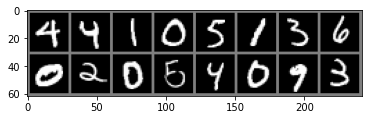

torch.Size([16]) torch.Size([16, 1, 28, 28])


In [4]:
def imshow(img):
  img = img/2+0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(img,(1,2,0)))
  plt.show()
dataiter = iter(trainloader)
image ,labels = dataiter.next()
imshow(torchvision.utils.make_grid(image))
print(labels.shape,image.shape)

In [0]:
class Network(nn.Module):
    
    def __init__(self):
        super(Network, self).__init__()
        # convolutional layer
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=32, kernel_size=(3,3), stride=1)
        # convolutional layer
        self.conv2 = nn.Conv2d(in_channels=32,out_channels=64, kernel_size=(3,3), stride=1)
        # max pooling layer
        self.pool = nn.MaxPool2d(kernel_size = (2,2),stride=2)
        # dropout layer 1 (p=0.25)
        self.dropout1 = nn.Dropout(0.25)
        # linear layer (9216 -> 128)
        self.fc1 = nn.Linear(9216, 128)
        # dropout layer 2 (p=0.5)
        self.dropout2 = nn.Dropout(0.5)
        # linear layer (500 -> 10)
        self.fc2 = nn.Linear(128, 10)

        
    def forward(self, x):
       # add sequence of convolutional and max pooling layers
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        #Flattening the output for the Linear layers
        x = x.view(x.size(0),-1) 
        #Dropout Layer
        x = self.dropout1(x)
        #Linear fully-connected layer and ReLU
        x = torch.relu(self.fc1(x))
        #Dropout Layer
        x = self.dropout2(x)
        #Linear fully-connected layer and Softmax
        x = torch.softmax(self.fc2(x), dim=1)
        
        return x

net = Network().cuda()

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 134 == 133:    # print every 500 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 133))
            running_loss = 0.0

print('Finished Training')

[1,   134] loss: 2.319
[1,   268] loss: 2.315
[1,   402] loss: 2.309
[1,   536] loss: 2.300
[1,   670] loss: 2.279
[1,   804] loss: 2.200
[1,   938] loss: 2.020
[1,  1072] loss: 1.902
[1,  1206] loss: 1.844
[1,  1340] loss: 1.777
[1,  1474] loss: 1.749
[1,  1608] loss: 1.731
[1,  1742] loss: 1.688
[1,  1876] loss: 1.686
[1,  2010] loss: 1.669
[1,  2144] loss: 1.653
[1,  2278] loss: 1.650
[1,  2412] loss: 1.630
[1,  2546] loss: 1.633
[1,  2680] loss: 1.633
[1,  2814] loss: 1.624
[1,  2948] loss: 1.624
[1,  3082] loss: 1.621
[1,  3216] loss: 1.617
[1,  3350] loss: 1.608
[1,  3484] loss: 1.611
[1,  3618] loss: 1.613
[2,   134] loss: 1.602
[2,   268] loss: 1.598
[2,   402] loss: 1.608
[2,   536] loss: 1.590
[2,   670] loss: 1.595
[2,   804] loss: 1.586
[2,   938] loss: 1.593
[2,  1072] loss: 1.594
[2,  1206] loss: 1.587
[2,  1340] loss: 1.587
[2,  1474] loss: 1.590
[2,  1608] loss: 1.587
[2,  1742] loss: 1.573
[2,  1876] loss: 1.576
[2,  2010] loss: 1.572
[2,  2144] loss: 1.575
[2,  2278] 

In [8]:
for i, data in enumerate(testloader, 0):
  images = data[0].to(device)
  labels = data[1].to(device)
print(labels)

tensor([9, 1, 4, 1, 2, 1, 6, 3, 5, 4, 8, 5, 3, 6, 3, 1], device='cuda:0')


Ground Truth:  9 1 4 1 2 1 6 3 5 4 8 5 3 6 3 1
Predicted:     9 1 4 1 2 1 4 3 5 4 8 5 3 6 7 1


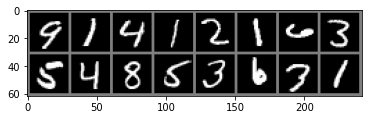

In [9]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

print('Ground Truth: ', ' '.join('%1s' % classes[labels[j]] for j in range(16)))
print('Predicted:    ', ' '.join('%1s' % classes[predicted[j]] for j in range(16)))
# print images
imshow(torchvision.utils.make_grid(images.cpu()))


In [10]:
correct = 0
total = 0
with torch.no_grad():
    for i, data in enumerate(testloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 20000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 20000 test images: 95 %


In [11]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for i, data in enumerate(testloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of     0 : 98 %
Accuracy of     1 : 98 %
Accuracy of     2 : 94 %
Accuracy of     3 : 95 %
Accuracy of     4 : 96 %
Accuracy of     5 : 96 %
Accuracy of     6 : 97 %
Accuracy of     7 : 96 %
Accuracy of     8 : 94 %
Accuracy of     9 : 91 %
